In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/library_catalogue_20231126.csv')

In [3]:
df.columns

Index(['Name', 'Author', 'Pub Year', 'ISBN-13', 'Publisher',
       'Imprint Publisher', 'BookType', 'Primary Genre', 'Genres',
       'Ficiton/non-fiction', 'Series', 'Volume', 'Unit Price', 'Page number',
       'Language', 'Read by Stinky', 'Read by Matt', 'QTY', 'To/From'],
      dtype='object')

## Data Cleaning

In [4]:
df = df.replace('na',np.nan)
df['Imprint Publisher'] = df['Imprint Publisher'].str.replace("'", "")
df['Publisher'] = df['Publisher'].str.replace("'", "")
df['Genres'] = df['Genres'].str.replace("'", "")
df['Primary Genre'] = df['Primary Genre'].str.replace("History ", "History")
# df['Genres'] = df['Genres'].str.replace("Romance", "")

In [5]:
df['Ficiton/non-fiction'] = df['Ficiton/non-fiction'].replace('Poetry', 'fiction')
df['Ficiton/non-fiction'] = df['Ficiton/non-fiction'].replace('Ficion', 'fiction')
df['Ficiton/non-fiction'] = df['Ficiton/non-fiction'].str.title()
df['Ficiton/non-fiction'] = df['Ficiton/non-fiction'].str.strip()

In [6]:
df['Publisher'] = df['Publisher'].str.strip()
df['Publisher'] = df['Publisher'].str.title()

In [7]:
df['BookType'] = df['BookType'].str.title()
df['BookType'] = df['BookType'].str.strip()

In [8]:
df['Imprint Publisher'] = df['Imprint Publisher'].str.title()
df['Imprint Publisher'] = df['Imprint Publisher'].str.strip()

In [9]:
df['Unit Price'] = df['Unit Price'].str[1:]

In [10]:
df['Unit Price'] = df['Unit Price'].astype(float)

In [11]:
df['Author'] = df['Author'].str.strip()
df['Author'] = df['Author'].str.title()
df['surname'] = [x.split(' ')[-1] for x in df['Author']]

## Bookshelf order system

In [14]:
legacy_order = ['Modern & Contemporary Fiction', 'Short Stories', 'Crime & Mystery', 
                            'Romance', 'Classic Fiction', 'Literary Essays', 'Poetry',
                            'Fantasy', 'Science Fiction', 'Young Adult', "Children's & Teenage",
                            'Historical Fiction', 'Myths & Legends', 
                            'Popular Science', 'Academic','Sociology', 'Philosophy', 'History', 'Feminist Theory', 'Memoirs',
                            'Gifts', 'Travel & Holiday Guides', 'Careers', 'DIY', 'Cookery']

In [15]:
df['Primary Genre'] = df['Primary Genre'].str.strip()
df['Primary Genre numerical'] = df['Primary Genre']
for i, genre in enumerate(legacy_order):
    df['Primary Genre numerical'] = df['Primary Genre numerical'].str.replace(genre, str(i))
df['Primary Genre numerical'] = df['Primary Genre numerical'].astype(int)
    
book_order = df.sort_values(['Ficiton/non-fiction', 'Primary Genre numerical', 'surname'])[['Name', 'Author', 'Ficiton/non-fiction', 'Primary Genre']].reset_index(drop=True)
book_order.to_csv('bookshelf_order_231126.csv',index=False)

In [16]:
df.Author.str.replace('.', '')

0                       Susan Abulhawa
1                         Andre Aciman
2                        Douglas Adams
3             Chimamanda Ngozi Adichie
4                       Dolly Alderton
                    ...               
493    Parker S Huntington And LJ Shen
494                       Grace Reilly
495                   Patrick Rothfuss
496                     Lauren Roberts
497                       Hannah Grace
Name: Author, Length: 498, dtype: object

In [17]:
df.to_csv('cleaned_bookshelf_09042025.csv',index=False)

In [17]:
df.sort_values(['Ficiton/non-fiction', 'Primary Genre numerical', 'surname'])[70:80]

,Name,Author,Pub Year,ISBN-13,Publisher,Imprint Publisher,BookType,Primary Genre,Genres,Ficiton/non-fiction,...,Volume,Unit Price,Page number,Language,Read by Stinky,Read by Matt,QTY,To/From,surname,Primary Genre numerical
225,Memphis,Tara M. Stringfellow,2023,9781529339253,Hachette,John Murray,Paperback,Modern & Contemporary Fiction,Modern & Contemporary Fiction,Fiction,...,NaN,9.99,252,NaN,0,0,1,NaN,Stringfellow,0
401,Animal,Lisa Taddeo,2021,9781526630940,Bloomsbury,Bloomsbury Circus,Proof,Modern & Contemporary Fiction,"Modern & Contemporary Fiction, Feminism & Femi...",Fiction,...,NaN,NaN,321,NaN,1,0,1,NaN,Taddeo,0
399,The Secret History,Donna Tartt,1993,9780140167771,Penguin Group,Penguin Books,Paperback,Modern & Contemporary Fiction,"Modern & Contemporary Fiction, Dark Academia",Fiction,...,NaN,8.99,628,NaN,1,0,1,NaN,Tartt,0
254,Maror,Lavie Tidhar,2022,9781838931360,Bloomsbury,Head Of Zeus,Proof,Modern & Contemporary Fiction,Modern & Contemporary Fiction,Fiction,...,NaN,NaN,554,NaN,0,0,2,NaN,Tidhar,0
390,Spoilt Creatures,Amy Twigg,2024,9781035411573,Hachette,Headline,Proof,Modern & Contemporary Fiction,"Modern & Contemporary Fiction, Psycology",Fiction,...,NaN,NaN,323,NaN,1,0,1,NaN,Twigg,0
215,On Earth We're Briefly Gorgeous,Ocean Vuong,2019,9781529110685,Penguin Random House,Vintage,Paperback,Modern & Contemporary Fiction,Modern & Contemporary Fiction,Fiction,...,NaN,8.99,242,NaN,1,0,1,NaN,Vuong,0
206,I'm Sorry You Feel That Way,Rebecca Wait,2022,9781529420449,Hachette,Quercus,Hardback,Modern & Contemporary Fiction,"Modern & Contemporary Fiction, Illness",Fiction,...,NaN,16.99,390,NaN,0,0,1,NaN,Wait,0
217,Metronome,Tom Watson,2022,9781526639547,Bloomsbury,NaN,Proof,Modern & Contemporary Fiction,Modern & Contemporary Fiction,Fiction,...,NaN,NaN,307,NaN,1,1,1,NaN,Watson,0
464,Cleaner,Brandi Wells,2023,9781472299550,Hachette,Headline,Proof,Modern & Contemporary Fiction,Modern & Contemporary Fiction,Fiction,...,NaN,NaN,325,NaN,0,0,1,NaN,Wells,0
208,Crook Manifesto,Colson Whitehead,2023,9780349727646,Hachette,"Little, Brown",Proof,Modern & Contemporary Fiction,Modern & Contemporary Fiction,Fiction,...,2,NaN,319,NaN,0,0,1,NaN,Whitehead,0


## Analytics

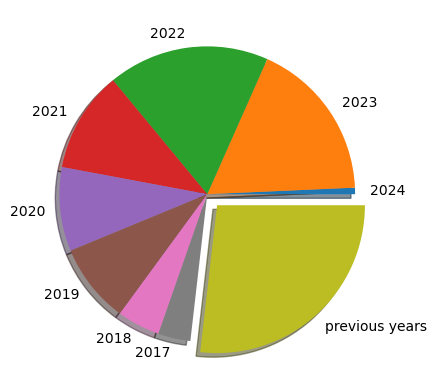

In [195]:
pub_year_years = list(df['Pub Year'].value_counts().keys())
pub_year_counts = list(df['Pub Year'].value_counts().values)

pub_year_df = pd.DataFrame({
    'pub_year': pub_year_years,
    'frequency': pub_year_counts
}).sort_values('pub_year', ascending=False).reset_index(drop=True)

pub_year_df['pub_year'] = pub_year_df['pub_year'].astype(int)
pub_year_df['pseudo_pub_year'] = pub_year_df['pub_year']
pub_year_df.loc[pub_year_df.query("pub_year < 2017").index, 'pseudo_pub_year'] = 2016

pub_year_df = pub_year_df.groupby(['pseudo_pub_year'])['frequency'].sum().reset_index(drop=False).sort_values('pseudo_pub_year', ascending=False)
pub_year_df['pseudo_pub_year'] = pub_year_df['pseudo_pub_year'].replace(2016, 'previous years')
plt.pie(pub_year_df['frequency'], labels = pub_year_df['pseudo_pub_year'], shadow=True, explode = [0,0,0,0,0,0,0,0,0.1]);

In [197]:
df['Publisher'] = df['Publisher'].str.replace("Penguin Group", "Penguin Random House")
df['Publisher'] = df['Publisher'].str.replace("Random House", "Penguin Random House")
df['Publisher'] = df['Publisher'].str.replace("Penguin Penguin Random House", "Penguin Random House")

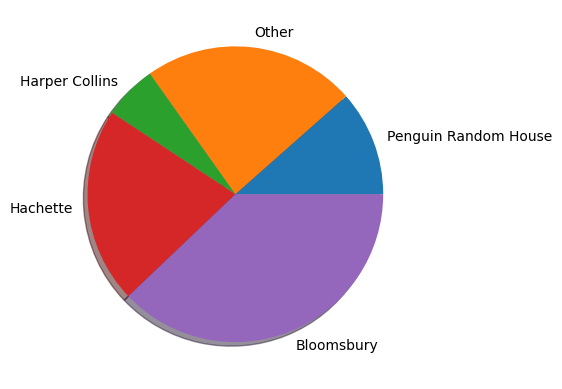

In [198]:
pub_year_years = list(df['Publisher'].value_counts().keys())
pub_year_counts = list(df['Publisher'].value_counts().values)

pub_year_df = pd.DataFrame({
    'Publisher': pub_year_years,
    'frequency': pub_year_counts
}).sort_values('Publisher', ascending=False).reset_index(drop=True)

pub_year_df['pseudo_Publisher'] = pub_year_df['Publisher']
pub_year_df = pub_year_df.sort_values('frequency', ascending = False).reset_index(drop=True)
pub_year_df.loc[np.arange(4, len(pub_year_df)), 'pseudo_Publisher'] = 'Other'

pub_year_df = pub_year_df.groupby(['pseudo_Publisher'])['frequency'].sum().reset_index(drop=False).sort_values('pseudo_Publisher', ascending=False)
plt.pie(pub_year_df['frequency'], labels = pub_year_df['pseudo_Publisher'], shadow=True);

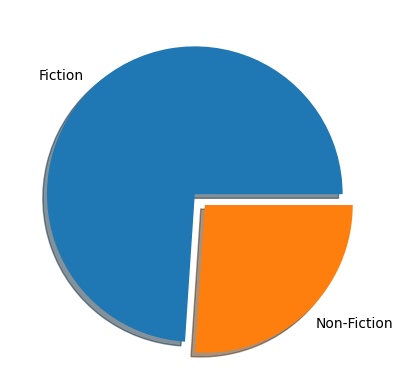

In [199]:
fic_nonfic = df.groupby('Ficiton/non-fiction').size().reset_index(drop=False)
fic_nonfic.columns = ['fiction', 'frequency']
plt.pie(fic_nonfic['frequency'], labels = fic_nonfic['fiction'], explode = [0,0.1], shadow=True);

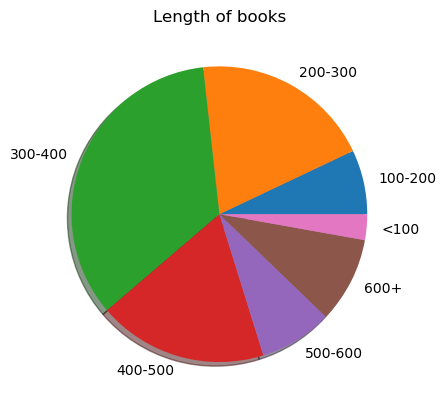

In [201]:
df.loc[df.query("`Page number` < 100").index, 'page_number_group'] = '<100'
df.loc[df.query("`Page number` < 200 and `Page number` > 99").index, 'page_number_group'] = '100-200'
df.loc[df.query("`Page number`< 300 and `Page number` > 199").index, 'page_number_group'] = '200-300'
df.loc[df.query("`Page number` < 400 and `Page number` > 299").index, 'page_number_group'] = '300-400'
df.loc[df.query("`Page number` < 500 and `Page number` > 399").index, 'page_number_group'] = '400-500'
df.loc[df.query("`Page number` < 600 and `Page number` > 499").index, 'page_number_group'] = '500-600'
df.loc[df.query("`Page number` > 599").index, 'page_number_group'] = '600+'

PageN = df.groupby('page_number_group').size().reset_index(drop=False)
PageN.columns = ['PageN', 'frequency']
plt.pie(PageN['frequency'], labels = PageN['PageN'], shadow=True);
plt.title('Length of books');

<BarContainer object of 25 artists>

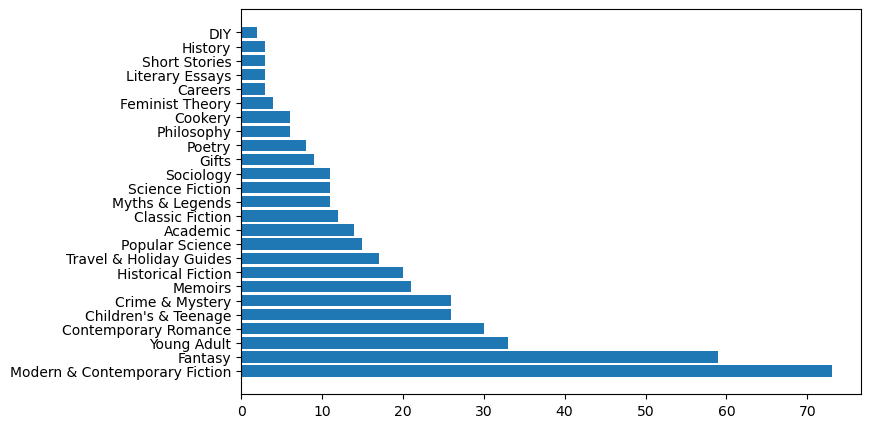

In [203]:
prim_gen = df.groupby(['Primary Genre']).size().reset_index(drop=False)
prim_gen.columns = ['genre', 'frequency']
plt.figure(figsize = (8,5))
plt.barh(prim_gen.sort_values('frequency', ascending=False).genre, prim_gen.sort_values('frequency', ascending=False).frequency)

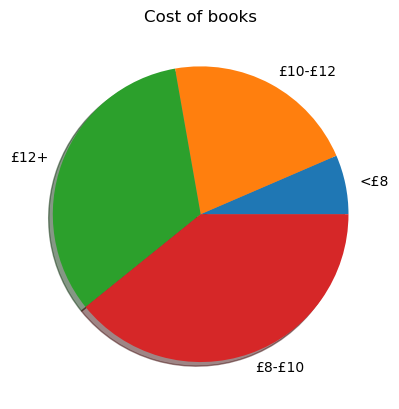

In [204]:
df.loc[df.query("`Unit Price` < 8").index, 'price'] = '<£8'
df.loc[df.query("`Unit Price` < 10 and `Unit Price` > 7").index, 'price'] = '£8-£10'
df.loc[df.query("`Unit Price` < 12 and `Unit Price` > 9").index, 'price'] = '£10-£12'
df.loc[df.query("`Unit Price` > 11").index, 'price'] = '£12+'

price_df = df.groupby('price').size().reset_index(drop=False)
price_df.columns = ['price', 'frequency']
plt.pie(price_df['frequency'], labels = price_df['price'], shadow=True);
plt.title('Cost of books');

<BarContainer object of 6 artists>

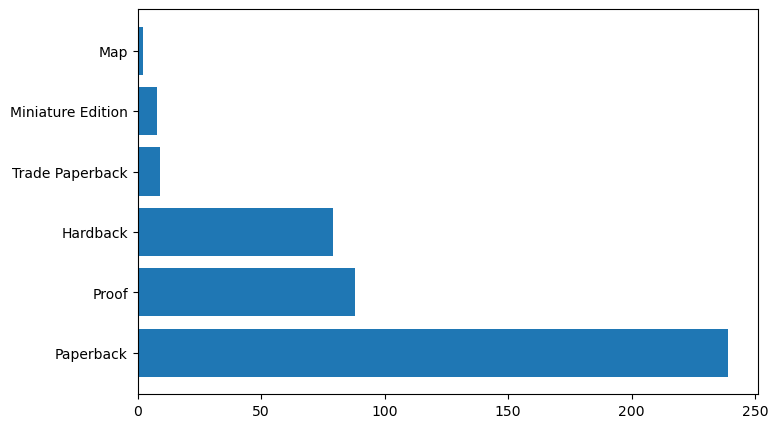

In [218]:
df['BookType'] = df['BookType'].str.replace("Paperback With Flaps", "Paperback").replace("Paperback - A Format", "Paperback").replace("Flexiback", "Paperback").replace("Butchered Hardback", "Hardback")

booktype_df_keys = list(df['BookType'].value_counts().keys())
booktype_df_vals = list(df['BookType'].value_counts().values)

booktype_df = pd.DataFrame({
    'BookType': booktype_df_keys,
    'frequency': booktype_df_vals
}).sort_values('BookType', ascending=False).reset_index(drop=True)
plt.figure(figsize = (8,5))
plt.barh(booktype_df.sort_values('frequency', ascending=False).BookType, booktype_df.sort_values('frequency', ascending=False).frequency)

In [236]:
df['Author'] = df['Author'].str.strip()
df['Author'] = df['Author'].str.replace('George R R Martin','George R.R Martin')
df['Author'] = df['Author'].str.replace('Sarah J Maas','Sarah J. Maas')
author_df = df.groupby(['Author'])['QTY'].sum().reset_index(drop=False)
author_df.columns = ['Author', 'frequency']
author_df.sort_values('frequency', ascending = False)[0:10].to_csv('artefacts/top_10_author_presence.csv', index=False)

In [159]:
len(df.query("Series.notnull() and Series != '0' and Series != 'o'")['Series'].drop_duplicates()), len(df.query("Series.notnull() and Series != '0' and Series != 'o'")['Series'])

(54, 127)

In [219]:
df['Page number'] = df['Page number'].fillna(0).astype(int)
df['Page number'].sum()

160874

In [220]:
df[['Read by Stinky', 'Read by Matt']].sum()

Read by Stinky    123
Read by Matt       62
dtype: int64